In [3]:
library('tidyverse')

# Review

In [2]:
`ggplot`

arguments: 
1. data ("dataframe")
1. aesthetic mappint (how to "encode" our data with chart markings)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:4: unexpected symbol
3: arguments: 
4: 1. data
      ^


`geom_`

Chart "marks." Bars, points, lines, etc. All markings have a corresponding `geom_` function.

`scale_`

The `scale_` function fine tunes our encodings (colors, the label text, etc.).

e.g.

`scale_x_log10()`

or,

`scale_color_brewer(palette = 'Set2')`

`theme_` and `theme`

Adjust our chart's appearance—that is, things like axis text font, background color, grid lines. etc. 

<span style = "color:blue;"> With these functions, we can create professional grade plots

# Advanced usage

Encodings and data are passed from the `ggplot` function to geoms.

```R
p = ggplot(mpg, aes(x = displ, y = hwy))

# the data and mappings are passed to geom_point here
p = p + geom_point()

p
```

<span style = "color:blue;"> Above is a way to provide specific data to a singular geom

We can also pass our data and encodings directly the `geom_` functions.

In [4]:
library('palmerpenguins')
library('scales')
options(repr.plot.height = 3, repr.plot.width = 5, repr.plot.res = 250)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




<span style = "color:blue;"> Below is an alternate syntax for a chart we've seen before

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


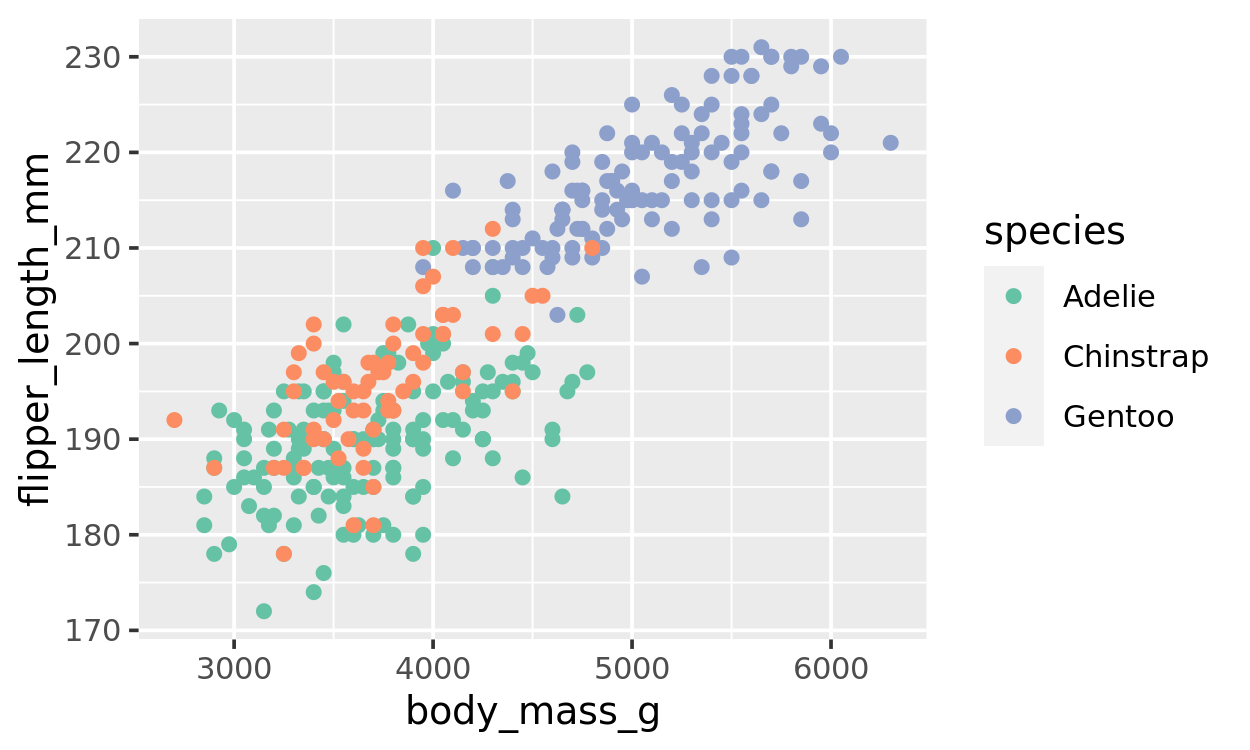

In [5]:
p = ggplot()
           
# why are we using the argument names here?
p = p + geom_point(data = penguins, 
                   mapping = aes(x = body_mass_g, y = flipper_length_mm, color = species))

p = p + scale_color_brewer(palette = 'Set2')

p

When is it useful to exploit this other `ggplot` usage?

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


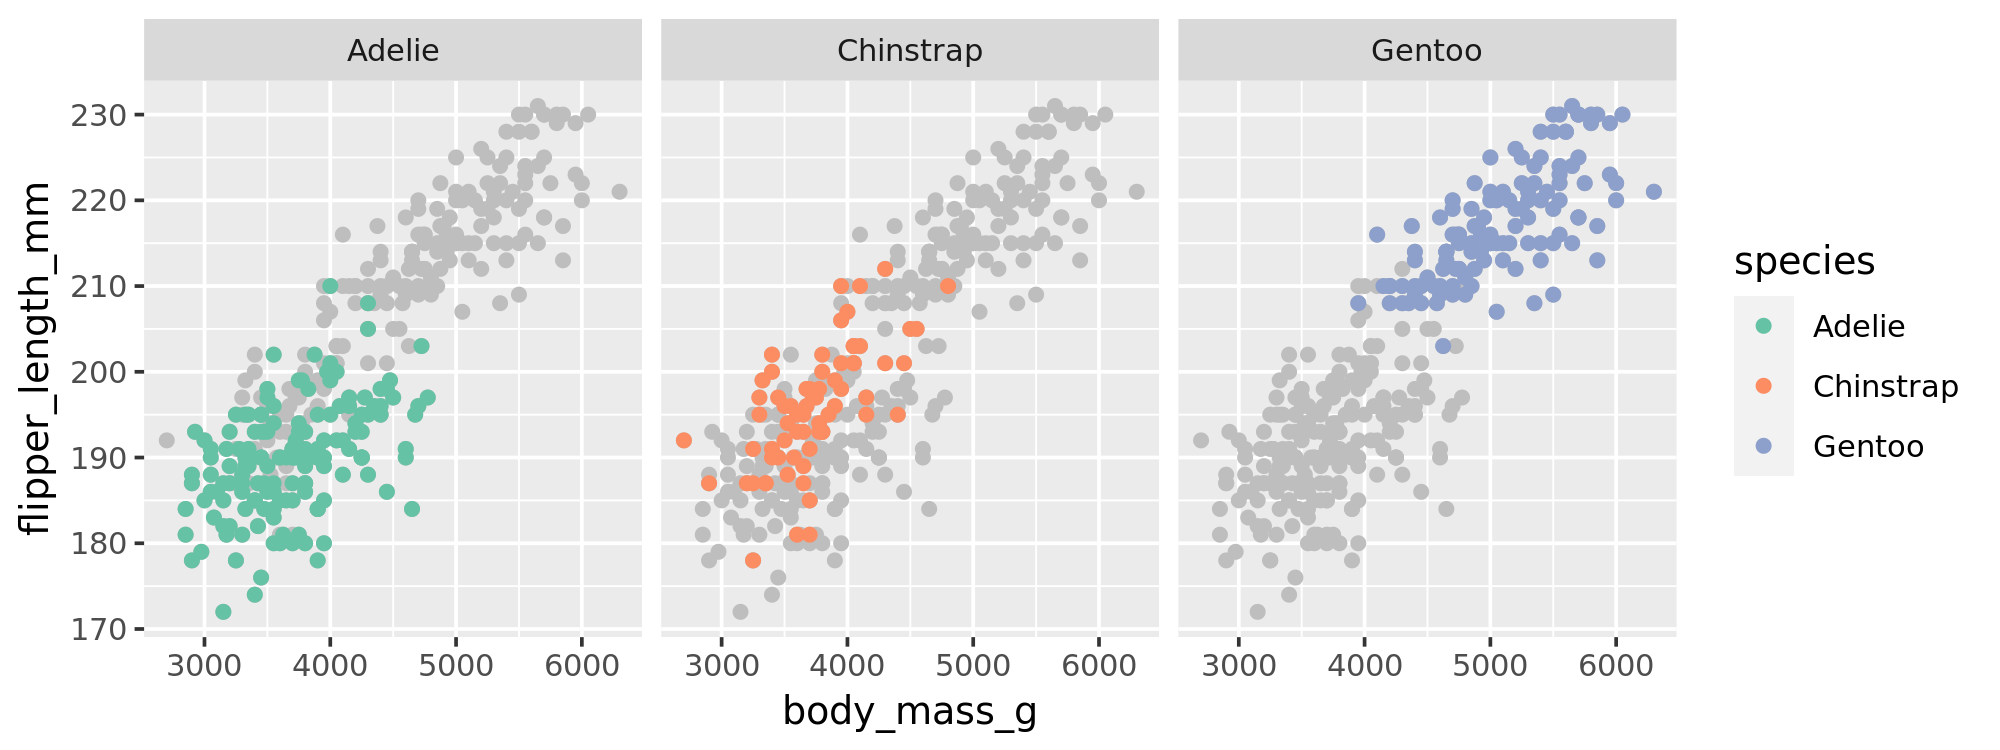

In [6]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.res = 250)
p = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species))
           
p = p + geom_point(color = 'gray', data = penguins %>% select(-species))

p = p + geom_point()

p = p + scale_color_brewer(palette = 'Set2')

p = p + facet_wrap(~species)

p

<span style = "color:blue;"> We want to make a chart like the one above - we need a way to plot all of our data and a subset of our data at the same time...
    
<span style = "color:blue;">We can do this using our alternative syntax

<span style = "color:blue;">This is a way to get rid of a column: `penguins |> select(-species) |> head()`

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


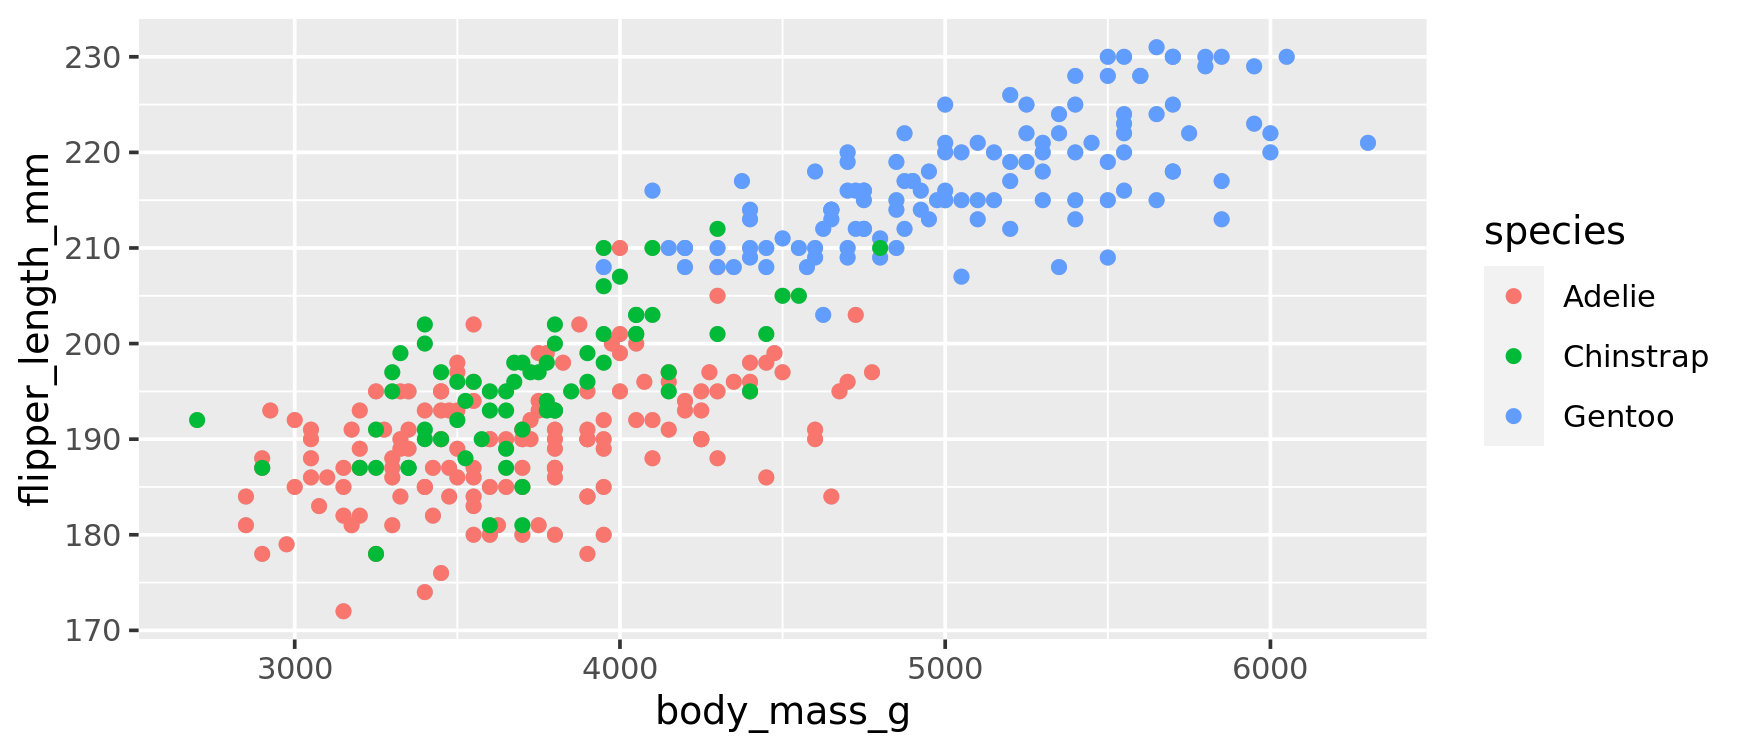

In [9]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.res = 250)

p = ggplot(mapping = aes(x = body_mass_g, y = flipper_length_mm, color = species)) + 
    geom_point(color = 'gray', data = penguins %>% select(-species)) +
    geom_point(data = penguins)

p

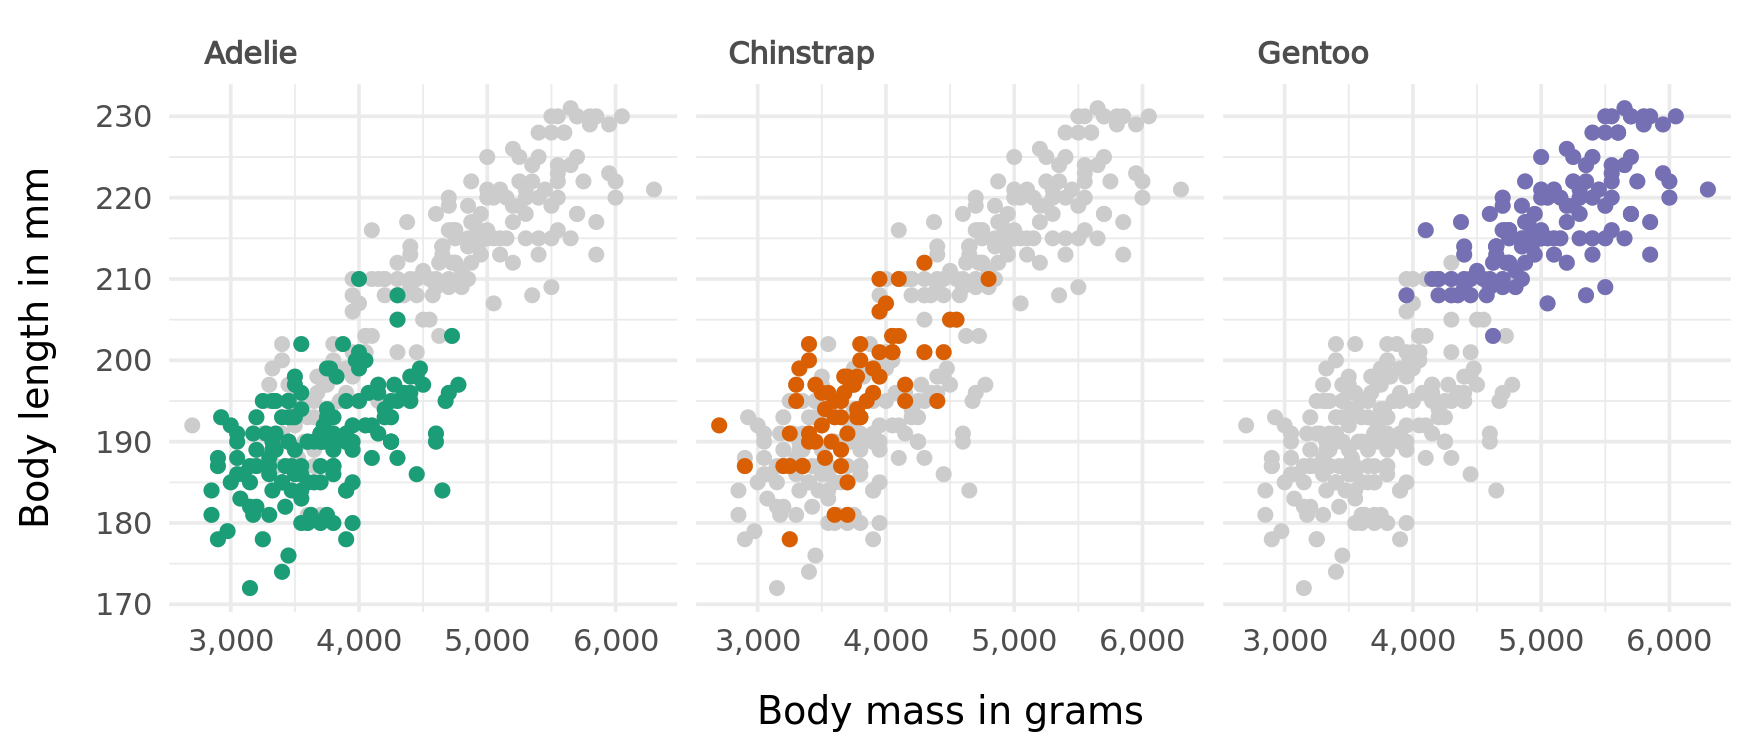

In [11]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.res = 250)

#Can provide your own palatte by specifically naming it

p = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species))
           
p = p + geom_point(color = 'grey80', data = penguins %>% select(-species), na.rm = T) #here we're setting the color to be grey, rather than encoding that

p = p + geom_point(na.rm = T)

p = p + facet_wrap(~species)

p = p + scale_color_brewer(palette = 'Dark2')

p = p + scale_x_continuous(labels = comma)

p = p + theme_minimal()

p = p + labs(x = 'Body mass in grams', y = 'Body length in mm', color = 'some name for color')

p = p + theme(
    axis.title.y = element_text(margin = margin(l = 0, r = 10, t = 0, b = 0)),
    axis.title.x = element_text(margin = margin(l = 0, r = 0, t = 10, b = 0)),
    strip.text = element_text(hjust = 0.05, color = 'grey30', face = 'bold'),
    legend.position = 'none'
)

p